# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
#Testing my URL
units = 'metric'
url = f'https://api.openweathermap.org/data/2.5/weather?units={units}&appid={weather_api_key}'
url

'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=62c9c1f1d2af1b98082b02777fc3f34f'

In [19]:
# Set the API base URL
units = 'metric'
url = f'https://api.openweathermap.org/data/2.5/weather?units={units}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | kani keli
Processing Record 10 of Set 1 | churapcha
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | mariental
Processing Record 13 of Set 1 | clinton
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | santa maria del oro
Processing Record 18 of Set 1 | lushun
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | north bay
Processing Record 22 of Set 1 | bilibino
Processing Record 

Processing Record 40 of Set 4 | chepstow
Processing Record 41 of Set 4 | vorgashor
Processing Record 42 of Set 4 | greenville
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | palikir - national government center
Processing Record 45 of Set 4 | namdrik
Processing Record 46 of Set 4 | itaueira
Processing Record 47 of Set 4 | flying fish cove
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | khandyga
Processing Record 0 of Set 5 | makoua
Processing Record 1 of Set 5 | labrador city
Processing Record 2 of Set 5 | muborak
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | warrnambool
Processing Record 5 of Set 5 | grand falls-windsor
Processing Record 6 of Set 5 | kristiansund
Processing Record 7 of Set 5 | sikeston
Processing Record 8 of Set 5 | umuahia
Processing Record 9 of Set 5 | arroio grande
Processing Record 10 of Set 5 | costa teguise
City not found. Skipping...
Processing Record 11 of Set 5 | salalah
Processing Record 

Processing Record 31 of Set 8 | nshamba
Processing Record 32 of Set 8 | remire-montjoly
Processing Record 33 of Set 8 | rongelap
Processing Record 34 of Set 8 | dryden
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | butte
Processing Record 38 of Set 8 | quartu sant'elena
Processing Record 39 of Set 8 | mogocha
Processing Record 40 of Set 8 | hadibu
Processing Record 41 of Set 8 | huron
Processing Record 42 of Set 8 | rudnyy
Processing Record 43 of Set 8 | torrox
Processing Record 44 of Set 8 | north tamworth
Processing Record 45 of Set 8 | el calafate
Processing Record 46 of Set 8 | severobaykal'sk
City not found. Skipping...
Processing Record 47 of Set 8 | gaspe
Processing Record 48 of Set 8 | swakopmund
Processing Record 49 of Set 8 | yoloten
Processing Record 0 of Set 9 | gloucester
Processing Record 1 of Set 9 | sillod
Processing Record 2 of Set 9 | den helder
Processing Record 3 of Set 9 | basco
Processing Record 4

Processing Record 19 of Set 12 | ostersund
Processing Record 20 of Set 12 | itapirapua
Processing Record 21 of Set 12 | tual
Processing Record 22 of Set 12 | nova olinda do norte
Processing Record 23 of Set 12 | vernon
Processing Record 24 of Set 12 | revda
Processing Record 25 of Set 12 | port augusta
Processing Record 26 of Set 12 | tyukhtet
Processing Record 27 of Set 12 | yelandur
Processing Record 28 of Set 12 | tionk essil
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | benguela
Processing Record 31 of Set 12 | andratx
Processing Record 32 of Set 12 | mount isa
Processing Record 33 of Set 12 | canutama
Processing Record 34 of Set 12 | urangan
Processing Record 35 of Set 12 | kendari
Processing Record 36 of Set 12 | qujing
Processing Record 37 of Set 12 | charters towers
Processing Record 38 of Set 12 | muroto-misakicho
Processing Record 39 of Set 12 | florence
Processing Record 40 of Set 12 | arvi
Processing Record 41 of Set 12 | opuwo
Processing Record 4

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.90,82,31,4.77,GS,1684884027
1,yellowknife,62.4560,-114.3525,17.29,29,75,6.71,CA,1684884011
2,waitangi,-43.9535,-176.5597,12.68,95,2,1.79,NZ,1684884013
3,udachny,66.4167,112.4000,3.03,74,59,5.53,RU,1684884278
4,talnakh,69.4865,88.3972,-0.44,95,62,4.46,RU,1684884279


# Create Output_data directory

In [28]:
import os
import pandas as pd

# Create the 'output_data' directory if it doesn't exist
directory = 'output_data'
if not os.path.exists(directory):
    os.makedirs(directory)

# Export the DataFrame to CSV
csv_path = os.path.join(directory, 'cities.csv')
city_data_df.to_csv(csv_path, index=False)


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.90,82,31,4.77,GS,1684884027
1,yellowknife,62.4560,-114.3525,17.29,29,75,6.71,CA,1684884011
2,waitangi,-43.9535,-176.5597,12.68,95,2,1.79,NZ,1684884013
3,udachny,66.4167,112.4000,3.03,74,59,5.53,RU,1684884278
4,talnakh,69.4865,88.3972,-0.44,95,62,4.46,RU,1684884279


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

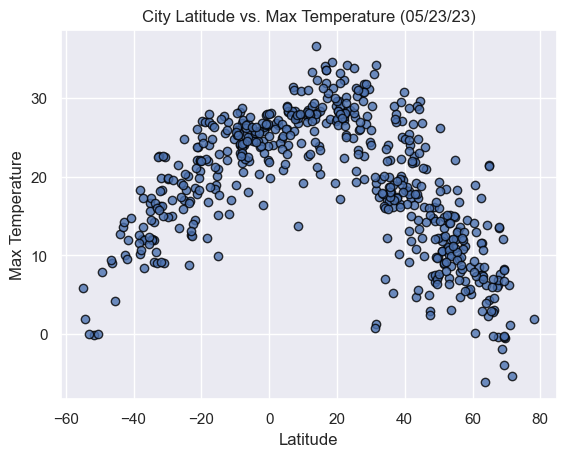

In [82]:
import seaborn as sns
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

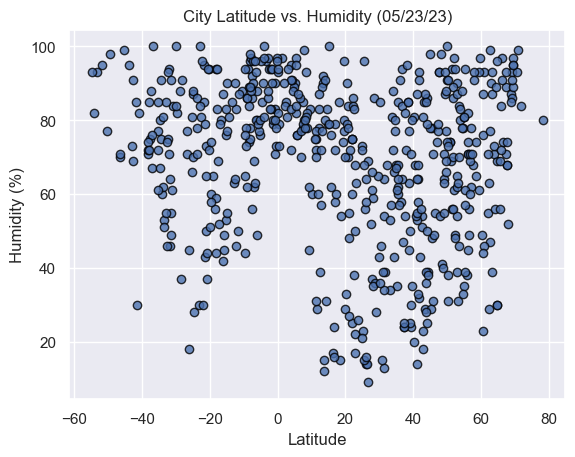

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

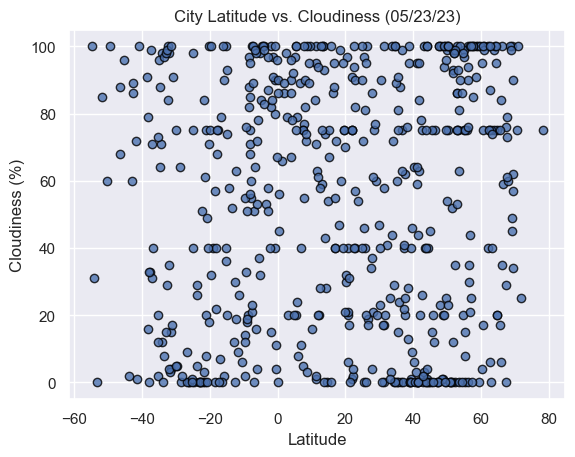

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

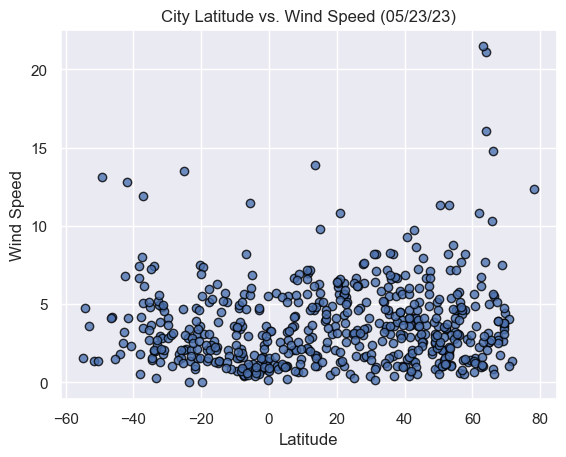

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
        # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
        # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=20, color="Red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [94]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,17.29,29,75,6.71,CA,1684884011
3,udachny,66.4167,112.4000,3.03,74,59,5.53,RU,1684884278
4,talnakh,69.4865,88.3972,-0.44,95,62,4.46,RU,1684884279
7,thompson,55.7435,-97.8558,13.09,38,75,3.09,CA,1684884281
9,churapcha,62.0025,132.4325,6.66,55,40,2.28,RU,1684884282


In [95]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.90,82,31,4.77,GS,1684884027
2,waitangi,-43.9535,-176.5597,12.68,95,2,1.79,NZ,1684884013
5,west island,-12.1568,96.8225,26.99,83,19,2.06,CC,1684884042
6,invercargill,-46.4000,168.3500,8.97,70,68,4.15,NZ,1684884281
8,kani keli,-12.9536,45.1033,25.59,63,12,5.70,YT,1684884282


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7924170893780342


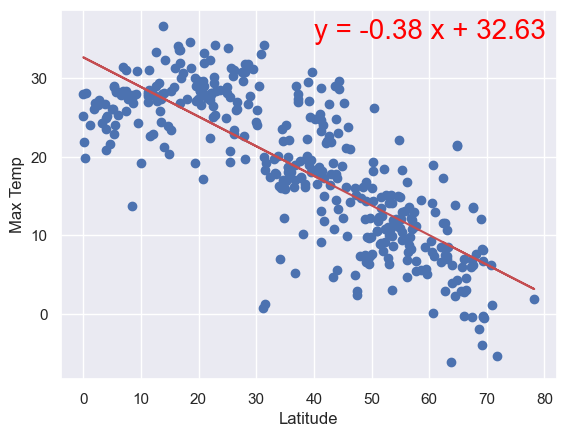

Based on the given r-squared value of -0.7924170893780342, there is a strong negative linear relationship between latitude and maximum temperature. As latitude increases (moving away from the equator), the maximum temperature tends to decrease.


In [102]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (40,35))

#Conclusion

r_squared = -0.7924170893780342
conclusion = f"Based on the given r-squared value of {r_squared}, there is a strong negative linear relationship between latitude and maximum temperature. As latitude increases (moving away from the equator), the maximum temperature tends to decrease."
print(conclusion)


The r-squared is: 0.8174472208234513


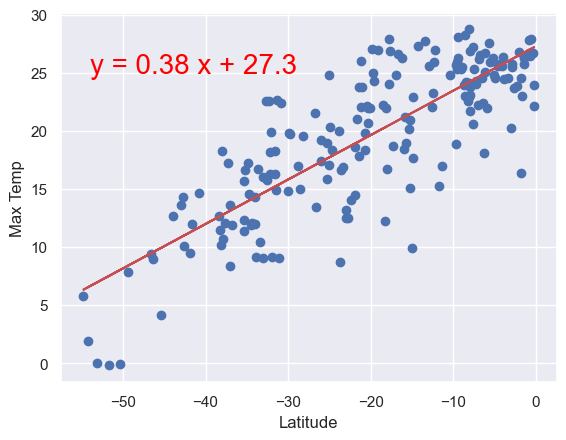

Based on the given r-squared value of 0.8174472208234513, there is a strong positive linear relationship between latitude and maximum temperature. As latitude increases (moving away from the equator), the maximum temperature tends to increase.


In [104]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (-54,25))

# Conclusion

r_squared = 0.8174472208234513
conclusion = f"Based on the given r-squared value of {r_squared}, there is a strong positive linear relationship between latitude and maximum temperature. As latitude increases (moving away from the equator), the maximum temperature tends to increase."
print(conclusion)


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.012253300576470463


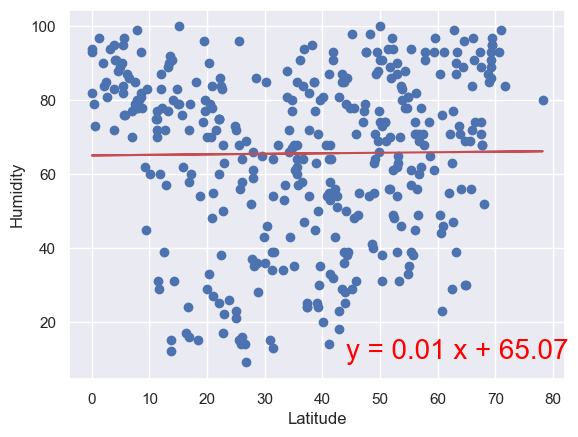

Based on the given r-squared value of 0.012253300576470463, there is a weak positive linear relationship between latitude and humidity. Changes in latitude have little influence on humidity levels.


In [107]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (44,10))

#Conclusion

r_squared = 0.012253300576470463
conclusion = f"Based on the given r-squared value of {r_squared}, there is a weak positive linear relationship between latitude and humidity. Changes in latitude have little influence on humidity levels."
print(conclusion)


The r-squared is: 0.13691385532682035


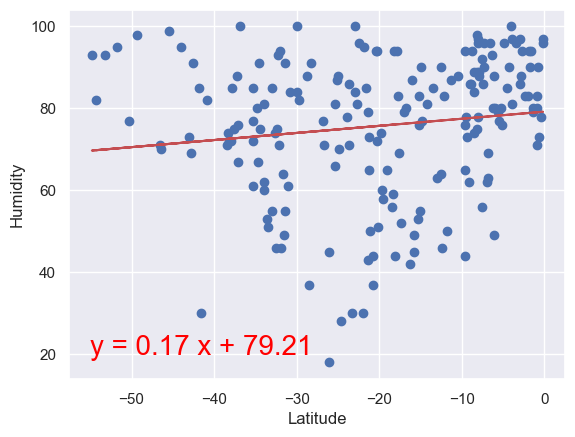

Weak positive linear relationship (r-squared = 0.13691385532682035) between latitude and humidity, suggesting a slight tendency for humidity levels to increase away from the equator.


In [108]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-55,20))

#Conclusion

r_squared = 0.13691385532682035
conclusion = f"Weak positive linear relationship (r-squared = {r_squared}) between latitude and humidity, suggesting a slight tendency for humidity levels to increase away from the equator."
print(conclusion)


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.0018214112555116093


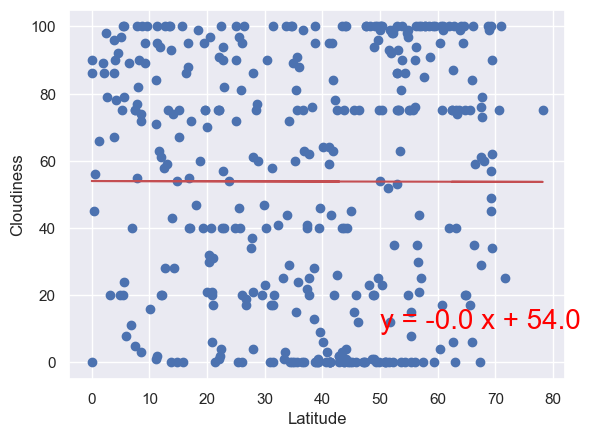

Based on the given r-squared value of -0.0018214112555116093, there is no significant linear relationship between latitude and cloudiness. Changes in latitude have little impact on cloudiness levels.


In [109]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (50,10))

#Conclusion
r_squared = -0.0018214112555116093
conclusion = f"Based on the given r-squared value of {r_squared}, there is no significant linear relationship between latitude and cloudiness. Changes in latitude have little impact on cloudiness levels."
print(conclusion)


The r-squared is: 0.09849031209492046


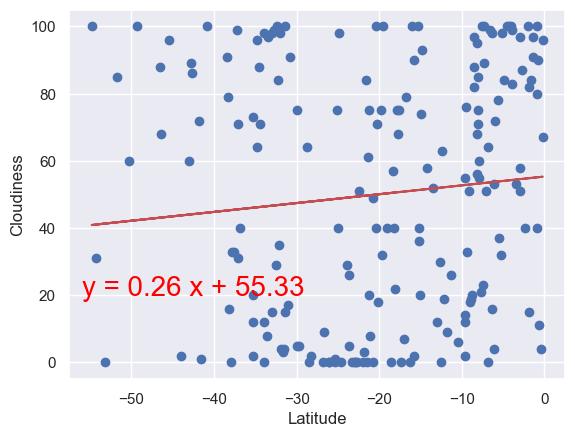

Weak positive linear relationship (r-squared = 0.09849031209492046) between latitude and cloudiness, indicating a slight tendency for cloudiness to increase away from the equator.


In [113]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-56,20))

#Conclusion

r_squared = 0.09849031209492046
conclusion = f"Weak positive linear relationship (r-squared = {r_squared}) between latitude and cloudiness, indicating a slight tendency for cloudiness to increase away from the equator."
print(conclusion)


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.09966551822971616


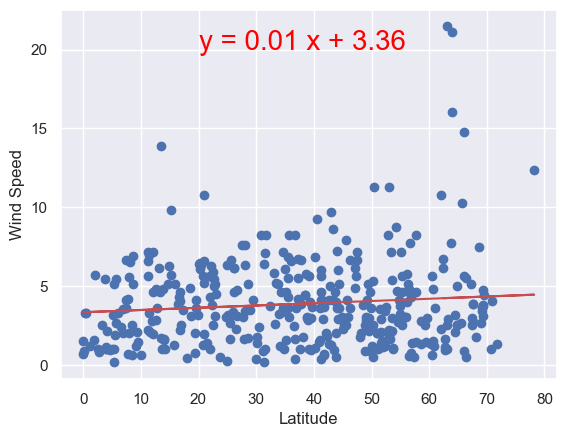

Weak positive linear relationship (r-squared = 0.09966551822971616) between latitude and wind speed, indicating a slight tendency for wind speed to increase away from the equator.


In [114]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (20,20))

#Conclusion
r_squared = 0.09966551822971616
conclusion = f"Weak positive linear relationship (r-squared = {r_squared}) between latitude and wind speed, indicating a slight tendency for wind speed to increase away from the equator."
print(conclusion)


The r-squared is: -0.25890456219783875


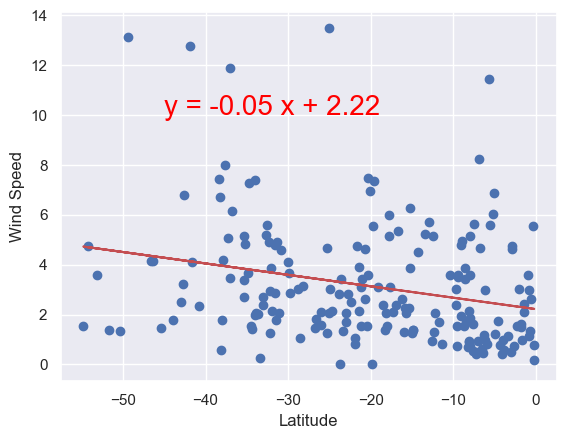

Weak negative relationship (r-squared = -0.25890456219783875) between latitude and wind speed. Moving away from the equator, there is a slight decrease in wind speed. Other factors also influence wind patterns.


In [117]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-45,10))

#Conclusion

r_squared = -0.25890456219783875
conclusion = f"Weak negative relationship (r-squared = {r_squared}) between latitude and wind speed. Moving away from the equator, there is a slight decrease in wind speed. Other factors also influence wind patterns."
print(conclusion)
